In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Data Science/Predict the cost to ship the sculptures/dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Science/Predict the cost to ship the sculptures/dataset/test.csv')

In [ ]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
train.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [ ]:
test.columns=[c.replace(" ","_") for c in test.columns]

In [ ]:
train.columns=[c.replace(" ","_") for c in train.columns]

In [ ]:
# combining the test and train dataset
Cost=train.Cost
train.drop('Cost',axis=1,inplace=True)
Customer_Id=test.Customer_Id
data=train.append(test)
data.tail()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
3495,fffe3200300037003100,Orlando Miller,0.36,13.0,6.0,23511.0,Marble,78.01,88.70,No,Yes,No,Airways,No,Wealthy,No,02/09/16,02/09/16,"Smithville, IA 22615"
3496,fffe390031003100,Javier Loughry,0.72,29.0,14.0,NaN,Bronze,214.85,80.28,Yes,Yes,No,Airways,No,Wealthy,No,11/26/18,11/30/18,"Kennethstad, NE 65012"
3497,fffe3200350031003700,Lashawnda Walton,0.59,12.0,6.0,NaN,Brass,8.91,19.58,No,No,Yes,Airways,No,Working Class,No,04/01/17,04/02/17,"Lake Christian, AL 95571"
3498,fffe3100380031003000,Rita Battee,NaN,17.0,9.0,565.0,Aluminium,6.75,10.89,No,Yes,Yes,Airways,No,Wealthy,No,06/28/17,06/28/17,"West Regina, UT 49761"
3499,fffe3200340037003300,Paul Jones,0.97,25.0,11.0,989903.0,Stone,4768.42,31.38,No,Yes,No,Airways,No,Working Class,No,02/19/19,02/15/19,"Carsonshire, KY 50092"


In [ ]:
data.describe()

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
count,9028.000000,9506.000000,9275.000000,9.264000e+03,10000.000000,10000.000000
mean,0.462369,21.591521,9.528625,3.913883e+05,1145.936085,37.038181
std,0.268147,11.871639,5.351653,2.620939e+06,8353.013952,26.677378
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000
25%,0.230000,12.000000,6.000000,4.957500e+02,5.210000,16.750000
50%,0.450000,20.000000,8.000000,3.032000e+03,7.670000,23.320000
75%,0.680000,29.000000,12.000000,3.560525e+04,86.537500,57.122500
max,1.000000,73.000000,50.000000,1.179279e+08,382385.670000,99.980000


In [ ]:
# Drop features missing more than 30% data
# calculating the % of missing data for each features

missing_features=data.isnull().mean().sort_values(ascending=False)

In [ ]:
missing_features.head(10)

Transport             0.1624
Artist_Reputation     0.0972
Remote_Location       0.0771
Material              0.0764
Weight                0.0736
Width                 0.0725
Height                0.0494
Customer_Location     0.0000
Price_Of_Sculpture    0.0000
Artist_Name           0.0000
dtype: float64

In [ ]:
data.dtypes

Customer_Id               object
Artist_Name               object
Artist_Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price_Of_Sculpture       float64
Base_Shipping_Price      float64
International             object
Express_Shipment          object
Installation_Included     object
Transport                 object
Fragile                   object
Customer_Information      object
Remote_Location           object
Scheduled_Date            object
Delivery_Date             object
Customer_Location         object
dtype: object

In [ ]:
data['Transport'].isnull().sum()

1624

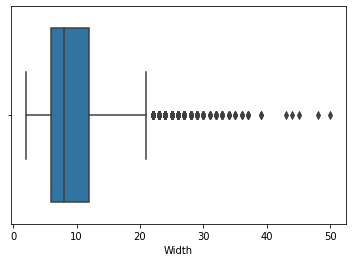

In [ ]:
sns.boxplot(x=data['Width'])

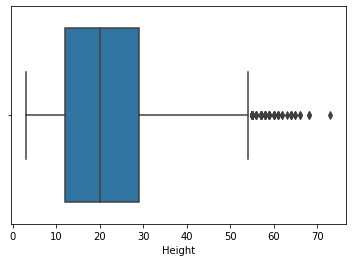

In [ ]:
sns.boxplot(x=data['Height'])

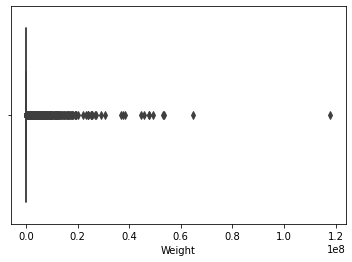

In [ ]:
sns.boxplot(x=data['Weight'])

In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(data['Weight'])

Outliers: [23972911.0, 11196264.0, 12496971.0, 17895571.0, 14616806.0, 12247852.0, 10712360.0, 14083967.0, 9724016.0, 13122717.0, 29282087.0, 26793635.0, 44587296.0, 18169592.0, 47544217.0, 12474924.0, 10740646.0, 11170102.0, 9288173.0, 17101644.0, 25254560.0, 19453774.0, 8691641.0, 12025261.0, 22094065.0, 10366187.0, 10148222.0, 11811959.0, 20346568.0, 19091622.0, 9117294.0, 16372329.0, 13037599.0, 9502360.0, 27317777.0, 9773200.0, 11075102.0, 25165789.0, 8315113.0, 14797323.0, 9294079.0, 13817875.0, 24039379.0, 47717848.0, 16007003.0, 15562715.0, 23884847.0, 8385994.0, 49145353.0, 10078717.0, 9719857.0, 53118478.0, 8325677.0, 19388767.0, 13423877.0, 14405551.0, 117927869.0, 9144579.0, 8786922.0, 17704429.0, 16841581.0, 12961980.0, 10104492.0, 15299202.0, 8597138.0, 15989786.0, 12206681.0, 8421872.0, 12710876.0, 16994302.0, 16314708.0, 25693893.0, 30636442.0, 11492124.0, 8838545.0, 19165757.0, 23362827.0, 36928110.0, 9285034.0, 8825669.0, 17530199.0, 8987408.0, 11143982.0, 9760241.0, 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


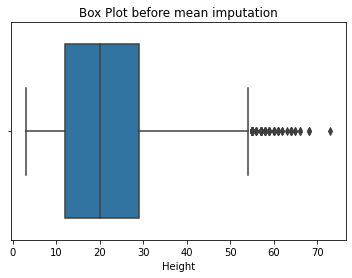

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


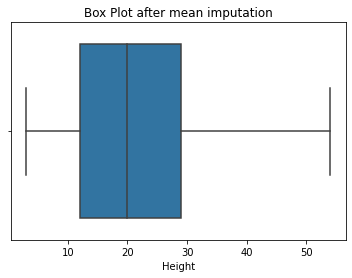

In [ ]:
#median imputation
sns.boxplot(data['Height'])
plt.title("Box Plot before mean imputation")
plt.show()
q1=data['Height'].quantile(0.25)
q3 = data['Height'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['Height'])
for i in data['Height']:
    if i > Upper_tail or i < Lower_tail:
            data['Height'] = data['Height'].replace(i, m)
sns.boxplot(data['Height'])
plt.title("Box Plot after mean imputation")
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


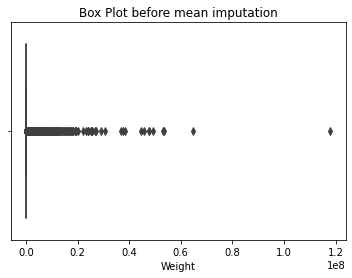

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


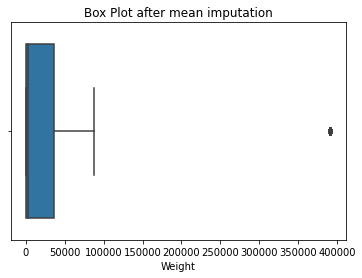

In [ ]:
sns.boxplot(data['Weight'])
plt.title("Box Plot before mean imputation")
plt.show()
q1=data['Weight'].quantile(0.25)
q3 = data['Weight'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['Weight'])
for i in data['Weight']:
    if i > Upper_tail or i < Lower_tail:
            data['Weight'] = data['Weight'].replace(i, m)
sns.boxplot(data['Weight'])
plt.title("Box Plot after mean imputation")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


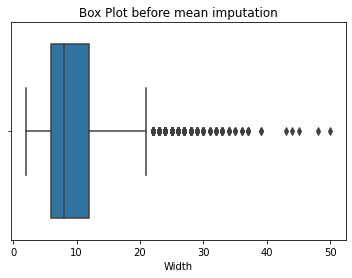

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


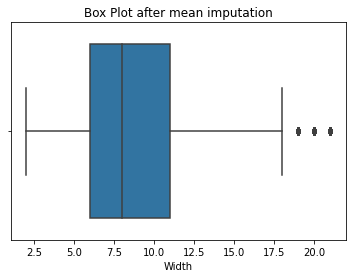

In [ ]:
sns.boxplot(data['Width'])
plt.title("Box Plot before mean imputation")
plt.show()
q1=data['Width'].quantile(0.25)
q3 = data['Width'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['Width'])
for i in data['Width']:
    if i > Upper_tail or i < Lower_tail:
            data['Width'] = data['Width'].replace(i, m)
sns.boxplot(data['Width'])
plt.title("Box Plot after mean imputation")
plt.show()

In [ ]:
# Filling null values 
data['Height'] = data['Height'].fillna( data['Height'].dropna().mean() )
data['Width']=data['Width'].fillna(data['Width'].dropna().mean() )
data['Weight']=data['Weight'].fillna(data['Weight'].dropna().mean())
data['Artist_Reputation']=data['Artist_Reputation'].fillna(data['Artist_Reputation'].dropna().mean())

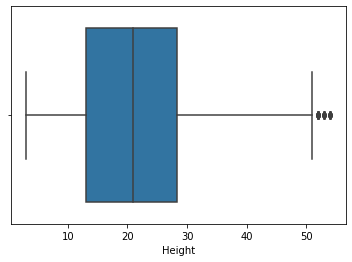

In [ ]:
sns.boxplot(x=data['Height'])

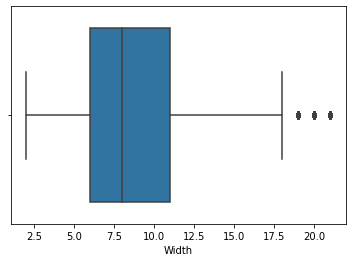

In [ ]:
sns.boxplot(x=data['Width'])

In [ ]:
data.isnull().sum()

Customer_Id                 0
Artist_Name                 0
Artist_Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price_Of_Sculpture          0
Base_Shipping_Price         0
International               0
Express_Shipment            0
Installation_Included       0
Transport                1624
Fragile                     0
Customer_Information        0
Remote_Location           771
Scheduled_Date              0
Delivery_Date               0
Customer_Location           0
dtype: int64

In [ ]:
data['Material'].value_counts(dropna=False)

Aluminium    1367
Bronze       1363
Brass        1340
Clay         1313
Wood         1307
Marble       1302
Stone        1244
NaN           764
Name: Material, dtype: int64

In [ ]:
data['Remote_Location'].fillna('No',inplace=True)

In [ ]:
data['Transport'].value_counts(dropna=False)

Roadways     3366
Airways      3033
Waterways    1977
NaN          1624
Name: Transport, dtype: int64

In [ ]:
data['Transport'].fillna(0,inppace=True)
data['Material'].fillna(0,inppace=True)


In [ ]:
data

Customer_Id              0
Artist_Name              0
Artist_Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price_Of_Sculpture       0
Base_Shipping_Price      0
International            0
Express_Shipment         0
Installation_Included    0
Transport                0
Fragile                  0
Customer_Information     0
Remote_Location          0
Scheduled_Date           0
Delivery_Date            0
Customer_Location        0
dtype: int64